# Fashion-MNIST con PyTorch

## Refs.

* https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

* https://github.com/zalandoresearch/fashion-mnist

* https://github.com/pranay414/Fashion-MNIST-Pytorch/blob/master/fashion_mnist.ipynb



## **Ejercicio 1)** Importando librerías

**0)** De ser necesario, **instale PyTorch** escribiendo

    !pip3 install torch torchvision torchaudio torchviz

**1)** Importe las librerías estandard de Python: `os`, `datetime`, `collections` y `pickle`.

**2)** Importe las siguientes librerías third party de Python: `matplotlib.pyplot`, `numpy`, `scipy`, `sklearn`, `pandas`, `dill` y `json`.

**3)** Importe las librerias necesarias de **PyTorch**: `torch` y `torchvision`.

**4)** Importe la librería: `google.colab`.

In [ ]:
# 1.0)
!pip3 install torch torchvision torchaudio torchviz

In [ ]:
# 1.1)
import os
import pickle
import datetime
from collections import defaultdict

In [ ]:
# 1.2)
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import sklearn as skl
import pandas as pd
#import dill
import json

In [ ]:
# 1.3)
import torch
import torch.optim as optim
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, Subset, random_split
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda, Compose
#from torchviz import make_dot

In [ ]:
# 1.4)
import google.colab
from google.colab import files

## **Ejercicio 2)** Bajando y Jugando con el dataset **Fashion-MNIST**.

**1)** Baje y transforme (i.e. normalize los valores de los pixeles) los conjuntos de entrenamiento y testeo de FashionMNIST.

**2)** Explore algunos ejemplos de estos conjuntos. Que formato poseen?

**3)** Visitando la página web de FashionMNIST, cree un diccionario de Python `Dict()` asociando cada categoría a un nombre adecuado de la misma.

**4)** Grafique un mosaico de 3x3 imagenes de FashionMNIST, cada una titulada con su respectiva clasificación

In [ ]:
# 2.1)
# Define a transform to normalize the data
transform = transforms.Compose([
                                transforms.ToTensor()
                                ,transforms.Normalize((0.5,), (0.5,))
                                #,transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

# Download and load the training data
train_set = datasets.FashionMNIST('MNIST_data/', download = True, train = True,  transform = transform)
valid_set = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 169kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.83MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.35MB/s]


In [ ]:
#2.2)
len(train_set), len(valid_set)

(60000, 10000)

In [ ]:
i = np.random.randint(len(train_set))
print(f"i={i}")
image,label = train_set[i]
print(f"image={image.shape}")
print(f"label={label}")

i=17273
image=torch.Size([1, 28, 28])
label=9


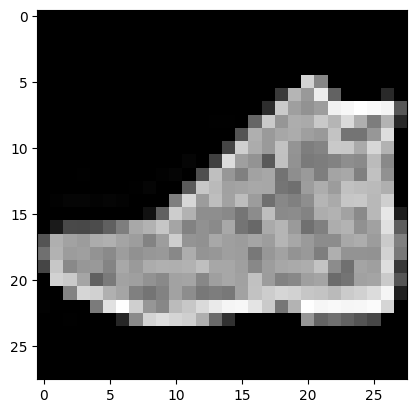

In [ ]:
plt.imshow(image.squeeze(), cmap='Greys_r')

In [ ]:
#2.3)
labels_names = {
    0: "T-Shirt", #remera
    1: "Trouser", #pantalon
    2:	"Pullover", #buzo
    3:	"Dress", #vestido
    4:	"Coat", #abrigo
    5:	"Sandal", #sandalia
    6:	"Shirt", #camisa
    7:	"Sneaker", #zapatilla
    8:	"Bag", #bolso
    9:	"Ankle Boot" #bota
}

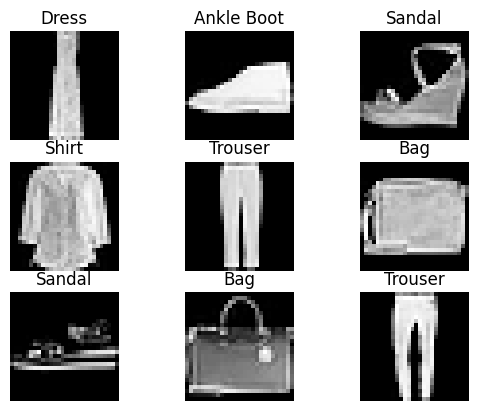

In [ ]:
#2.4)
figure = plt.figure()
cols,rows=3,3
for i in range (1,cols*rows+1):
  j = torch.randint(len(train_set), size=(1,)).item()
  image,label=train_set[j]
  figure.add_subplot(rows,cols,i)
  plt.title(labels_names[label])
  plt.axis("off")
  plt.imshow(image.squeeze(), cmap='Greys_r')
plt.show()

## **Ejercicio 3)** Creando un `DataLoader`

Creando un `DataLoader` para alimentar el modelo con batchs (lotes) de entrenamiento.

**1)** Cree los `DataLoader`s para cada conjunto. Defínalos con un `batch_size` de 100 y con el flag `shuffle` seteado a `True`.

**2)** Use uno de los `DataLoader`s creados anteriormente para explorar algunos elementos del conjunto.

Notar que, el iterador devuelve el batch en un par `(image,label)`.

El objeto `images` es un tensor de dimensiones `(100,1,28,28)`.
El 100 es el tamaño del batch.
El 1 porque hay un solo canal (en este caso, un canal de escala de grises, pero podría haber varios, p. ej. uno por cada color de {Red, Green Blue} en caso que fuesen imagenes a color).
Luego, 28 y 28 porque cada imagen del dataset es de 28 x 28 píxeles.

El objeto `labels` es un tensor de dimensiones `(100,)`.
La $i$-ésima entrada `labels[i]` de `labels` es un número en $\{0,1,...,9\}$ indicando la categoría a la que pertenece la $i$-ésima imagen en el batch, guardada en `images[i]`.

In [ ]:
# 3.1)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 100, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size = 100, shuffle = True)

In [ ]:
print(f"num samples ={len(train_loader.dataset)}")
print(f"num batches = {len(train_loader)}")

num samples =60000
num batches = 600


In [ ]:
#3.2)
train_iter = iter(train_loader)
images, labels = next(train_iter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([100, 1, 28, 28])
torch.Size([100])


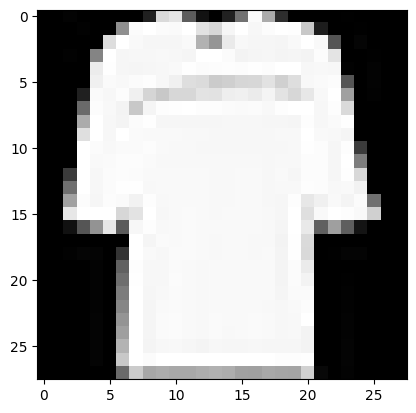

In [ ]:
plt.imshow(images[1].squeeze(), cmap='Greys_r')

In [ ]:
labels[1]

tensor(0)

## **Ejercicio 4)** Definiendo una Red Neuronal

Defina una red neuronal de 4 capas, una de entrada, dos ocultas de $n_1=128$ y $n_2=64$ neuronas, respectivamente, y una de salida de 10 neuronas.

En las capas intermedias utilice neuronas tipo ReLU y agregueles un *dropout* de p=0.2.
En la capa de salida no utilice funciones de activación ni dropout.

Las capas sucesivas tienen que estar totalmente conectadas entre si.

In [ ]:
# 4)
class NeuralNetwork(nn.Module):
  def __init__(self, n1, n2, p=0.2):
    super(NeuralNetwork, self).__init__()
    #Capa 0
    self.flatten = nn.Flatten() #capa flatten
    #Capa 1
    self.fc1 = nn.Linear(28*28, n1) #capa fully connected 1
    self.relu1 = nn.ReLU() #nodo relu 1
    self.dropo1 = nn.Dropout(p) #nodulo dropout 1
    #Capa 2
    self.fc2 = nn.Linear(n1, n2) #capa fully connected 2
    self.relu2 = nn.ReLU() #nodo relu 2
    self.dropo2 = nn.Dropout(p) #nodulo dropout 2
    #Capa 3
    self.fc3 = nn.Linear(n2,10) #capa fully connected 3

  def forward(self, x):
    #Capa 0
    x = self.flatten(x)
    #Capa 1
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.dropo1(x)
    #Capa 2
    x = self.fc2(x)
    x = self.relu2(x)
    x = self.dropo2(x)
    #Capa 3
    x=self.fc3(x)
    return x

In [ ]:
mi_red=NeuralNetwork(128,64)
print(mi_red(image).shape)

torch.Size([1, 10])


## Ejercicio 5) Entrenamiento del Modelo

Entrenamos el modelo

**1)** Implemente, en una función, un loop de entrenamiento que recorra los batchs (lotes).

**2)** Implemente, en una función, un loop de validación que recorra los batchs.

**3)** Inicialize dos `DataLoader`s llamados `train_loader` y `valid_loader` a partir del `train_set` (conjunto de entranmiento) y del `valid_set` (conjunto de validación) de Fashion-MNIST, respectivamente, y que usen batchs de 100 ejemplos.

**4)** Cree una función de pérdida usando la **Cross Entropy Loss**.

**IMPORTANTE:** Notar que la **Cross Entropy Loss** aplica automáticamente una `log_softmax`.

**5)** Cree un optimizador que utilice el método de **Stochastic Gradient Descent** con un learning rate igual a $10^{-3}$.

**6)** Cree una instancia del modelo.

**7)** Especifique en que dispositivo (`device`) va a trabajar: en una **CPU** o en una **GPU**.

**8)** Implemente un loop de entrenamiento y validación que trabaje con el `train_loader` y el `valid_loader`, respectivamente, usando un numero arbitrario de épocas.
Este loop debe guardar en cuatro listas los valores de los promedios del **Cross Entropy Loss** y las fracciones de clasificaciones correctas o **precisión** (accuracy) sobre el conjunto de **entrenamiento** y el de **validación**, respectivamente.

**IMPORTANTE:** No olvide copiar los batchs al dispositivo de trabajo.

**9)** Entrene y valide el modelo.

**10)** Use las listas del inciso anterior para graficar en función de las épocas la **Cross Entropy Loss** de **entrenamiento** y de **validación**.
Realize un gráfico análogo pero con la **precisión**.
Discuta y comente, cual es el número óptimo de épocas de entrenamiento?

**11)** Repita los experimentos variando hiperparámetros. Por ejemplo:

- El learning-rate.
- El optimizador (ej. puede usar ADAM).
- El valor de dropout.
- El número de neuronas en las capas intermedias.
- El número de épocas de entrenamiento.
- El tamaño de los lotes.

Discuta los resultados.

In [ ]:
# 5.1)
#Definir la función de entrenamiento
def train_loop(dataloader, model, loss_fn, optimizer):
  model.train() #activar la maquinaria de entrenamiento del modelo
  num_samples = len(dataloader.dataset)
  num_batches = len(dataloader)
  sum_loss = 0
  sum_correct = 0
  sum_samples = 0
  #iterar sobre los lotes (batches)
  for batch, (X, y) in enumerate(dataloader):
    X = X.to(device)
    y = y.to(device)
    batch_size = len(X)
    sum_samples = sum_samples + batch_size
    #calcular la predicción y perdida
    pred = model(X)
    loss = loss_fn(pred, y)
    #backpropagar con el optimizador
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #calcular la pérdida promedio
    sum_loss = sum_loss + (loss.item() * batch_size)
    #calcular el número de predicciones correctas
    sum_correct = sum_correct + ((pred.argmax(1) == y).type(torch.float).sum().item())
    if batch % (num_batches/10) == 0:
      avrg_loss = sum_loss/sum_samples
      precision = sum_correct/sum_samples
      print(f"@train_loop batch= {batch:>5d} avrg_loss ={avrg_loss:>7f} sample procesados= {100*sum_samples/num_samples:>5f}%")
  assert num_samples == sum_samples
  avrg_loss = sum_loss/sum_samples
  precision = sum_correct/sum_samples
  return avrg_loss, precision



In [ ]:
#5.2)
#Definir la función de validación
def eval_loop(dataloader, model, loss_fn, ds_train_valid="eval"):
  model.eval() #activar la maquinaria de validación del modelo
  num_samples = len(dataloader.dataset)
  num_batches = len(dataloader)
  sum_loss = 0
  sum_correct = 0
  sum_samples = 0
  #desactivar el cálculo de gradientes
  with torch.no_grad():
    #iterar sobre los lotes (batches)
    for X,y in dataloader:
      X = X.to(device)
      y=y.to(device)
      batch_size = len(X)
      sum_samples = sum_samples + batch_size
      #calcular la predicción y perdida
      pred = model(X)
      loss = loss_fn(pred, y)
      #calcular la pérdida promedio
      sum_loss = sum_loss + (loss.item() * batch_size)
      #calcular el número de predicciones correctas
      sum_correct = sum_correct + ((pred.argmax(1) == y).type(torch.float).sum().item())
  assert num_samples == sum_samples
  avrg_loss = sum_loss/sum_samples
  precision = sum_correct/sum_samples
  print(f"@eval_loop [{ds_train_valid}] avg_loss = {avrg_loss:>8f} precision = {(100 * precision):>0.1f}%")
  return avrg_loss, precision

In [ ]:
#5.3)
#Inicializar el train_loader y valid_loader
batch_size = 100
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True)

In [ ]:
#5.4)
#Crear una función de pérdida usando la Cross Entropy Loss
loss_fn = nn.CrossEntropyLoss()

In [ ]:
#5.6)
# Crear una instancia del modelo
n1=256
n2=128
p=0.2
model = NeuralNetwork(n1, n2, p=p)

In [ ]:
#5.5)
# Crear un optimizador que utilice el método de Stochastic Gradient Descent
learning_rate = 10 ** -3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #cambiar luego por adam y probar tambien!
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, eps=1e-8, weight_decay=0, amsgrad=False)

In [ ]:
#5.7)
# Determinar en qué dispositivo vamos a trabajar, una GPU o CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [ ]:
#5.8) y #5.9)
num_epochs = 50
list_train_avg_loss_inc=[]
list_train_avg_loss=[]
list_valid_avg_loss=[]
list_train_precision_inc=[]
list_train_precision=[]
list_valid_precision=[]
for epoch in range(num_epochs):
  print(f"\n--------------------------------------------------")
  print(f"Epoch {epoch+1}\n----------")
  train_avg_loss_incorrecta, train_precision_incorrecta = train_loop(train_loader, model, loss_fn, optimizer)
  train_avg_loss, train_precision = eval_loop(train_loader, model, loss_fn, ds_train_valid="train")
  valid_avg_loss, valid_precision = eval_loop(valid_loader, model, loss_fn, ds_train_valid="valid")
  list_train_avg_loss_inc.append(train_avg_loss_incorrecta)
  list_train_avg_loss.append(train_avg_loss)
  list_valid_avg_loss.append(valid_avg_loss)
  list_train_precision_inc.append(train_precision_incorrecta)
  list_train_precision.append(train_precision)
  list_valid_precision.append(valid_precision)

print("\nDone!")



--------------------------------------------------
Epoch 1
----------
@train_loop batch=     0 avrg_loss =2.274208 sample procesados= 0.166667%
@train_loop batch=    60 avrg_loss =2.280987 sample procesados= 10.166667%
@train_loop batch=   120 avrg_loss =2.272367 sample procesados= 20.166667%
@train_loop batch=   180 avrg_loss =2.263223 sample procesados= 30.166667%
@train_loop batch=   240 avrg_loss =2.253690 sample procesados= 40.166667%
@train_loop batch=   300 avrg_loss =2.243426 sample procesados= 50.166667%
@train_loop batch=   360 avrg_loss =2.233013 sample procesados= 60.166667%
@train_loop batch=   420 avrg_loss =2.221872 sample procesados= 70.166667%
@train_loop batch=   480 avrg_loss =2.210095 sample procesados= 80.166667%
@train_loop batch=   540 avrg_loss =2.198319 sample procesados= 90.166667%
@eval_loop [train] avg_loss = 2.043007 precision = 49.8%
@eval_loop [valid] avg_loss = 2.044337 precision = 49.8%

--------------------------------------------------
Epoch 2
------

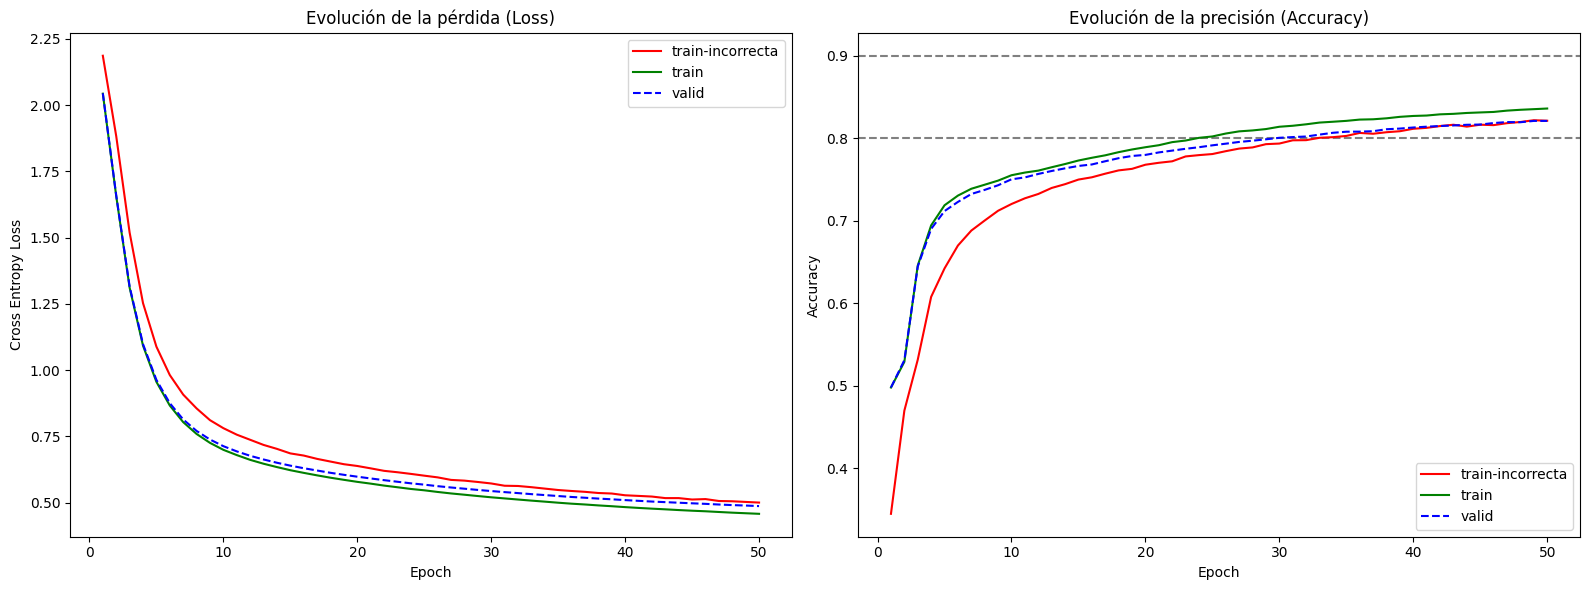

In [ ]:
#5.10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# ---------------------------
# SUBPLOT 1: LOSS
# ---------------------------
axes[0].set_title("Evolución de la pérdida (Loss)")
axes[0].set_ylabel("Cross Entropy Loss")
axes[0].set_xlabel("Epoch")


axes[0].plot(range(1, len(list_train_avg_loss_inc)+1), list_train_avg_loss_inc,
             label="train-incorrecta", linestyle='-', c='red')
axes[0].plot(range(1, len(list_train_avg_loss)+1), list_train_avg_loss,
             label="train", linestyle='-', c='green')
axes[0].plot(range(1, len(list_valid_avg_loss)+1), list_valid_avg_loss,
             label="valid", linestyle='--', c='blue')

axes[0].legend()

# ---------------------------
# SUBPLOT 2: ACCURACY
# ---------------------------
axes[1].set_title("Evolución de la precisión (Accuracy)")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")

axes[1].axhline(y=0.8, color='grey', linestyle='--')  # referencia
axes[1].axhline(y=0.9, color='grey', linestyle='--')  # referencia

axes[1].plot(range(1, len(list_train_precision_inc)+1), list_train_precision_inc,
             label="train-incorrecta", linestyle='-', c='red')
axes[1].plot(range(1, len(list_train_precision)+1), list_train_precision,
             label="train", linestyle='-', c='green')
axes[1].plot(range(1, len(list_valid_precision)+1), list_valid_precision,
             label="valid", linestyle='--', c='blue')

axes[1].legend()

plt.tight_layout()
plt.show()


La elección del número de épocas (epochs) es un paso clave en el entrenamiento de redes neuronales. Entrenar muy pocas épocas produce un modelo subajustado, incapaz de aprender los patrones esenciales del problema; entrenar demasiadas épocas produce sobreajuste, donde el modelo aprende demasiado los datos de entrenamiento (los memoriza) y luego pierde capacidad para generalizar a nuevos datos.

No existe un número fijo de épocas que sea “el óptimo” para todos los modelos o datasets. Depende de la complejidad de la red, del tamaño del dataset, del optimizador y del nivel de regularización aplicado. Sin embargo, sí hay un consenso metodológico en la forma de decidir cuándo detener el entrenamiento: el punto óptimo ocurre cuando el desempeño sobre el conjunto de validación deja de mejorar. Esto se observa cuando la pérdida de validación (validation loss) deja de disminuir y la precisión (validation accuracy) deja de aumentar. Si en cambio la pérdida de entrenamiento continúa bajando pero la de validación comienza a subir, estamos frente a señales de sobreajuste.

Para manejar esto de manera automática se utiliza la técnica de early stopping. Con early stopping se monitorea el desempeño sobre el conjunto de validación y se detiene el entrenamiento cuando no se logran mejoras durante un número determinado de épocas consecutivas (parámetro llamado patience). De esta manera, el modelo entrena solo lo necesario, se evita el sobreentrenamiento y se ahorra tiempo computacional. Además, es práctica habitual guardar el modelo con la mejor métrica de validación durante el entrenamiento, garantizando quedarnos con la mejor versión posible.

En resumen, el número óptimo de épocas no es aquel en el que el train loss llega al mínimo, sino aquel en el que las métricas de validación dejan de mejorar. El early stopping automatiza esta decisión y produce modelos más robustos y con mejor capacidad de generalización.

### 5.11) Variando Hiperparámetros

####  Optimizador SGD con diferentes LR


Se prueban valores de Learning Rate:

- alto (1e-2)
- baseline (1e-3)
- bajo (1e-4)


La tasa de aprendizaje (learning rate) tiene un rol fundamental en el desempeño del modelo, y su impacto depende del optimizador utilizado.

En el caso de **SGD** (*Stochastic Gradient Descent*), el algoritmo es altamente sensible al valor elegido: si la tasa de aprendizaje es demasiado alta, los pesos pueden oscilar y el modelo no logra converger; si es demasiado baja, la convergencia se vuelve extremadamente lenta y el entrenamiento requiere muchas épocas.

Por el contrario, **Adam** (*Adaptive Moment Estimation*) ajusta de manera adaptativa la tasa de aprendizaje para cada parámetro, utilizando promedios de gradientes pasados. Esto hace que Adam converja más rápido y sea menos dependiente del valor inicial del learning rate, permitiendo que funcione adecuadamente incluso con valores más altos o más variados en comparación con SGD.

En resumen, mientras que SGD exige una selección cuidadosa del learning rate para garantizar estabilidad, Adam ofrece mayor robustez y velocidad de convergencia.


In [ ]:
### 5.11.2)
### Experimento 1: Optimizador SGD - Comparación de Learning Rate

learning_rates_sgd = [1e-1, 1e-2, 1e-3]
results_lr_acc_sgd = {}
results_lr_loss_sgd = {}
results_lr_acc_inc_sgd = {}
results_lr_loss_inc_sgd = {}

num_epochs_30 = 30

for lr in learning_rates_sgd:
    print(f"\n===== Learning Rate (SGD): {lr} =====")

    model_lr = NeuralNetwork(n1, n2, p=0.2).to(device)
    optimizer_lr = torch.optim.SGD(model_lr.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    train_acc_hist = []
    valid_acc_hist = []
    train_loss_hist = []
    valid_loss_hist = []
    train_acc_hist_inc = []   # NEW
    train_loss_hist_inc = []  # NEW

    for epoch in range(num_epochs_30):
        print(f"\n--------------------------------------------------")
        print(f"Epoch {epoch+1}\n----------")

        train_loss_inc, train_acc_inc = train_loop(train_loader, model_lr, loss_fn, optimizer_lr)
        train_loss, train_acc = eval_loop(train_loader, model_lr, loss_fn, ds_train_valid="train")
        valid_loss, valid_acc = eval_loop(valid_loader, model_lr, loss_fn, ds_train_valid="valid")

        train_acc_hist.append(train_acc)
        valid_acc_hist.append(valid_acc)
        train_loss_hist.append(train_loss)
        valid_loss_hist.append(valid_loss)

        train_acc_hist_inc.append(train_acc_inc)    # NEW
        train_loss_hist_inc.append(train_loss_inc)  # NEW

    results_lr_acc_sgd[lr] = (train_acc_hist, valid_acc_hist)
    results_lr_loss_sgd[lr] = (train_loss_hist, valid_loss_hist)
    results_lr_acc_inc_sgd[lr] = train_acc_hist_inc
    results_lr_loss_inc_sgd[lr] = train_loss_hist_inc

print("\nDone!")



===== Learning Rate (SGD): 0.1 =====

--------------------------------------------------
Epoch 1
----------
@train_loop batch=     0 avrg_loss =2.303002 sample procesados= 0.166667%
@train_loop batch=    60 avrg_loss =1.316986 sample procesados= 10.166667%
@train_loop batch=   120 avrg_loss =1.043884 sample procesados= 20.166667%
@train_loop batch=   180 avrg_loss =0.915393 sample procesados= 30.166667%
@train_loop batch=   240 avrg_loss =0.839850 sample procesados= 40.166667%
@train_loop batch=   300 avrg_loss =0.789289 sample procesados= 50.166667%
@train_loop batch=   360 avrg_loss =0.748020 sample procesados= 60.166667%
@train_loop batch=   420 avrg_loss =0.717230 sample procesados= 70.166667%
@train_loop batch=   480 avrg_loss =0.696616 sample procesados= 80.166667%
@train_loop batch=   540 avrg_loss =0.674087 sample procesados= 90.166667%
@eval_loop [train] avg_loss = 0.437548 precision = 83.9%
@eval_loop [valid] avg_loss = 0.472972 precision = 82.4%

---------------------------

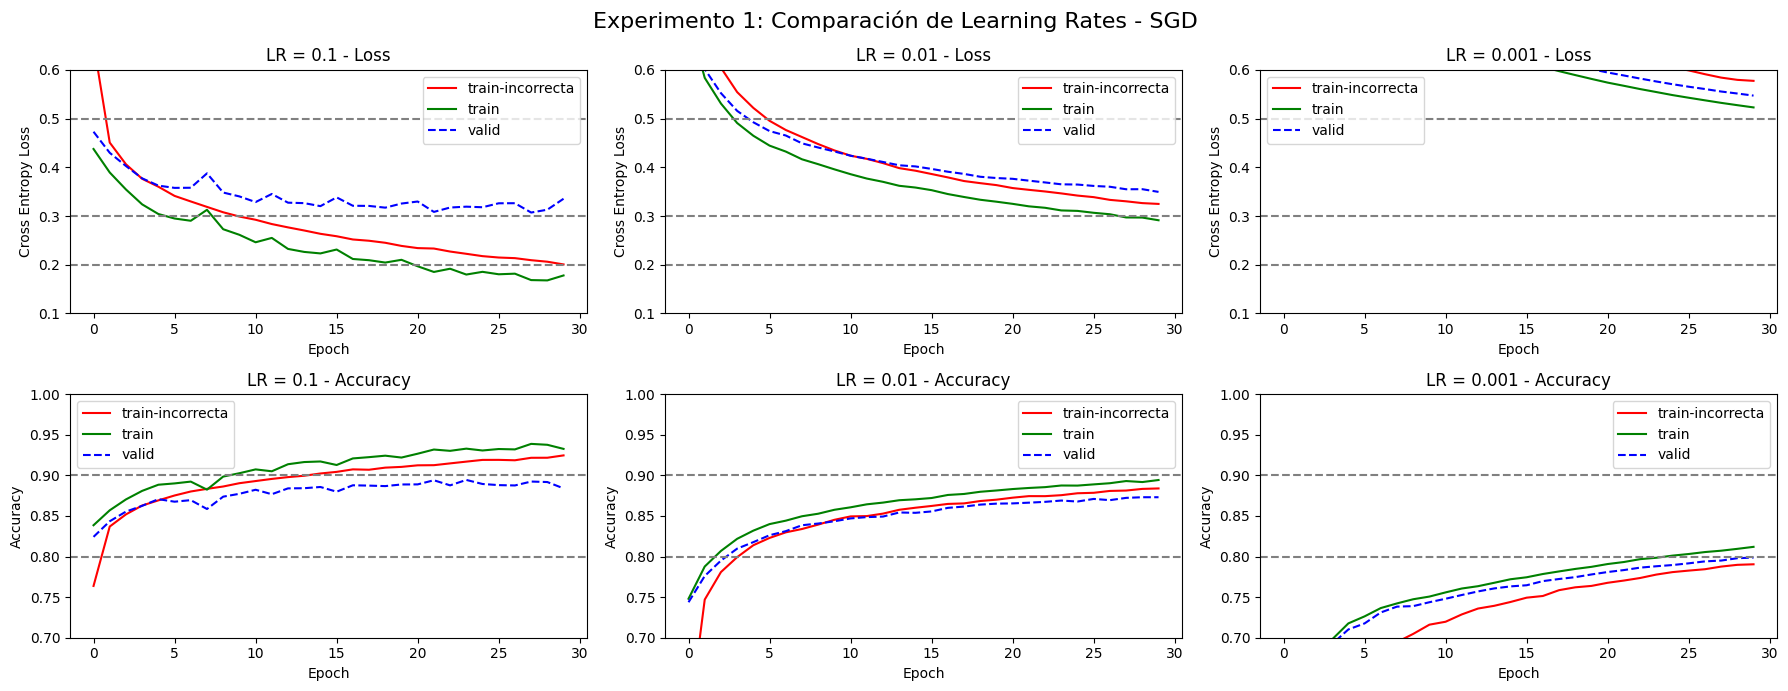

In [ ]:
### GRILLA 3x2 — Comparación LR (SGD)

fig, axes = plt.subplots(2, 3, figsize=(18, 7))
fig.suptitle("Experimento 1: Comparación de Learning Rates - SGD", fontsize=16)

for idx, lr in enumerate(learning_rates_sgd):
    train_loss, valid_loss = results_lr_loss_sgd[lr]
    train_acc, valid_acc   = results_lr_acc_sgd[lr]
    train_loss_inc = results_lr_loss_inc_sgd[lr]
    train_acc_inc  = results_lr_acc_inc_sgd[lr]

    # Loss
    axes[0][idx].plot(train_loss_inc, label="train-incorrecta", c='red')
    axes[0][idx].plot(train_loss, label="train", c='green')
    axes[0][idx].plot(valid_loss, label="valid", linestyle="--", c='blue')
    axes[0][idx].set_title(f"LR = {lr} - Loss")
    axes[0, idx].set_xlabel("Epoch")
    axes[0, idx].set_ylabel("Cross Entropy Loss")
    axes[0][idx].set_ylim(0.10, 0.60)
    axes[0][idx].axhline(y=0.50, linestyle="--", c='grey')
    axes[0][idx].axhline(y=0.30, linestyle="--", c='grey')
    axes[0][idx].axhline(y=0.20, linestyle="--", c='grey')
    axes[0][idx].legend()

    # Accuracy
    axes[1][idx].plot(train_acc_inc, label="train-incorrecta", c='red')
    axes[1][idx].plot(train_acc, label="train", c='green')
    axes[1][idx].plot(valid_acc, label="valid", linestyle="--", c='blue')
    axes[1][idx].set_title(f"LR = {lr} - Accuracy")
    axes[1, idx].set_xlabel("Epoch")
    axes[1, idx].set_ylabel("Accuracy")
    axes[1][idx].set_ylim(0.70, 1.00)
    axes[1][idx].axhline(y=0.90, linestyle="--", c='grey')
    axes[1][idx].axhline(y=0.80, linestyle="--", c='grey')
    axes[1][idx].legend()

plt.tight_layout()
plt.show()


####  Optimizador Adam con diferentes LR


Se prueban valores de Learning Rate:

- alto (1e-2)
- baseline (1e-3)
- bajo (1e-4)


La tasa de aprendizaje (learning rate) tiene un rol fundamental en el desempeño del modelo, y su impacto depende del optimizador utilizado.

En el caso de **SGD** (*Stochastic Gradient Descent*), el algoritmo es altamente sensible al valor elegido: si la tasa de aprendizaje es demasiado alta, los pesos pueden oscilar y el modelo no logra converger; si es demasiado baja, la convergencia se vuelve extremadamente lenta y el entrenamiento requiere muchas épocas.

Por el contrario, **Adam** (*Adaptive Moment Estimation*) ajusta de manera adaptativa la tasa de aprendizaje para cada parámetro, utilizando promedios de gradientes pasados. Esto hace que Adam converja más rápido y sea menos dependiente del valor inicial del learning rate, permitiendo que funcione adecuadamente incluso con valores más altos o más variados en comparación con SGD.

En resumen, mientras que SGD exige una selección cuidadosa del learning rate para garantizar estabilidad, Adam ofrece mayor robustez y velocidad de convergencia.




In [ ]:
### 5.11.2)
###Experimento 2: Optimizador Adam - Comparación de Learning Rate

learning_rates = [1e-2, 1e-3, 1e-4]
results_lr_acc = {}
results_lr_loss = {}
results_lr_acc_inc = {}
results_lr_loss_inc = {}

num_epochs_30 = 30

for lr in learning_rates:
    print(f"\n===== Learning Rate: {lr} =====")

    model_lr = NeuralNetwork(n1, n2, p=0.2).to(device)
    optimizer_lr = torch.optim.Adam(model_lr.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    train_acc_hist = []
    valid_acc_hist = []
    train_loss_hist = []
    valid_loss_hist = []
    train_acc_hist_inc = []
    train_loss_hist_inc = []

    for epoch in range(num_epochs_30):
        print(f"\n--------------------------------------------------")
        print(f"Epoch {epoch+1}\n----------")

        # ENTRENAMIENTO  (INCORRECTO / SIN EVALUAR)
        train_loss_inc, train_acc_inc = train_loop(train_loader, model_lr, loss_fn, optimizer_lr)

        # EVALUACIÓN
        train_loss, train_acc = eval_loop(train_loader, model_lr, loss_fn, ds_train_valid="train")
        valid_loss, valid_acc = eval_loop(valid_loader, model_lr, loss_fn, ds_train_valid="valid")

        # Guardado normal
        train_acc_hist.append(train_acc)
        valid_acc_hist.append(valid_acc)
        train_loss_hist.append(train_loss)
        valid_loss_hist.append(valid_loss)

        # Guardado incorrecto (línea roja)
        train_acc_hist_inc.append(train_acc_inc)
        train_loss_hist_inc.append(train_loss_inc)

    results_lr_acc[lr] = (train_acc_hist, valid_acc_hist)
    results_lr_loss[lr] = (train_loss_hist, valid_loss_hist)
    results_lr_acc_inc[lr] = train_acc_hist_inc
    results_lr_loss_inc[lr] = train_loss_hist_inc

print("\nDone!")



===== Learning Rate: 0.01 =====

--------------------------------------------------
Epoch 1
----------
@train_loop batch=     0 avrg_loss =2.285507 sample procesados= 0.166667%
@train_loop batch=    60 avrg_loss =0.984730 sample procesados= 10.166667%
@train_loop batch=   120 avrg_loss =0.824669 sample procesados= 20.166667%
@train_loop batch=   180 avrg_loss =0.781094 sample procesados= 30.166667%
@train_loop batch=   240 avrg_loss =0.744073 sample procesados= 40.166667%
@train_loop batch=   300 avrg_loss =0.719871 sample procesados= 50.166667%
@train_loop batch=   360 avrg_loss =0.701484 sample procesados= 60.166667%
@train_loop batch=   420 avrg_loss =0.688950 sample procesados= 70.166667%
@train_loop batch=   480 avrg_loss =0.687055 sample procesados= 80.166667%
@train_loop batch=   540 avrg_loss =0.677853 sample procesados= 90.166667%
@eval_loop [train] avg_loss = 0.493612 precision = 81.9%
@eval_loop [valid] avg_loss = 0.527379 precision = 80.2%

--------------------------------

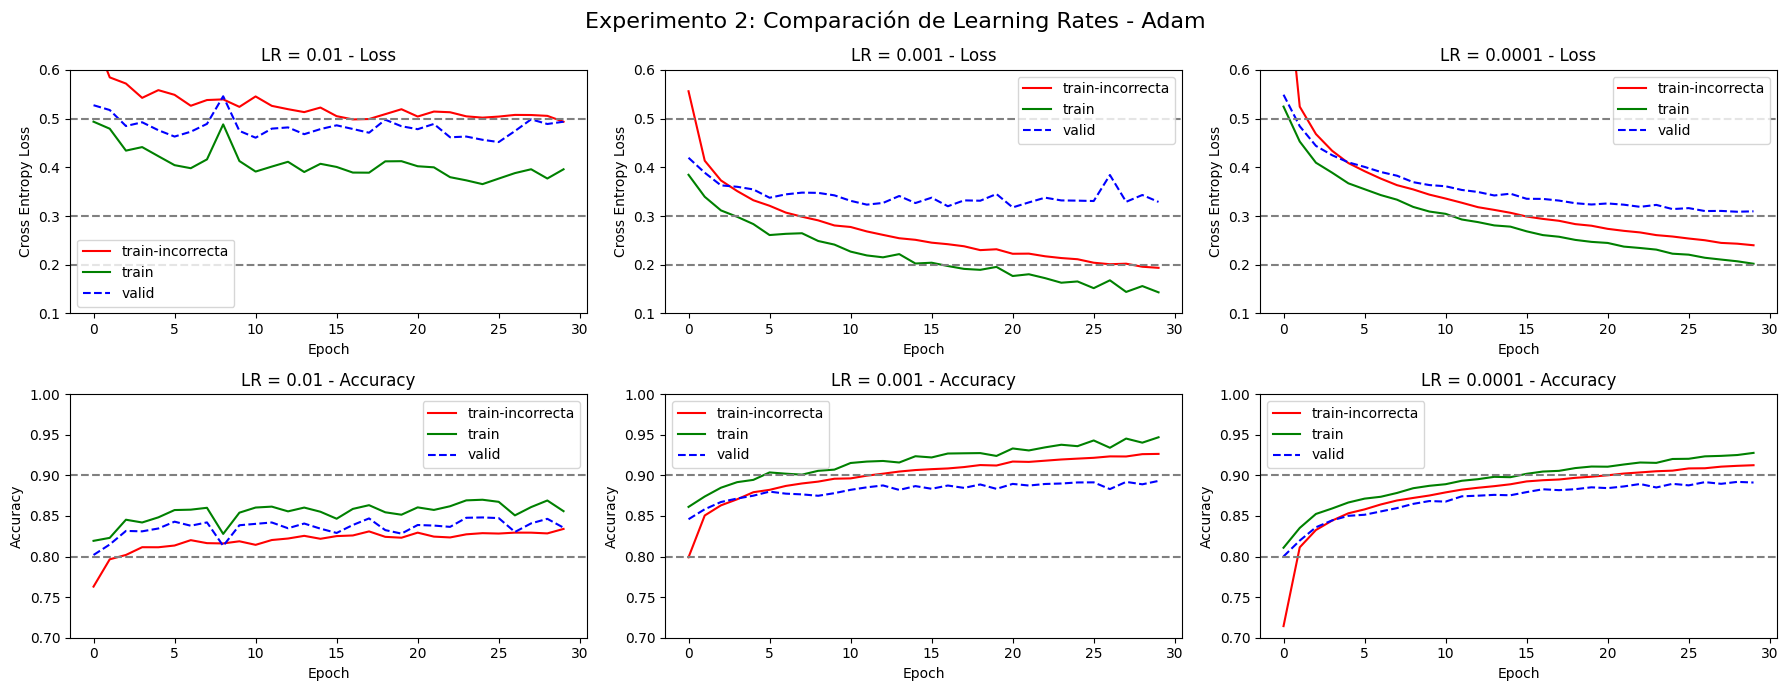

In [ ]:
### GRILLA 3x2 – Comparación LR (Adam)

fig, axes = plt.subplots(2, 3, figsize=(18, 7))
fig.suptitle("Experimento 2: Comparación de Learning Rates - Adam", fontsize=16)

for idx, lr in enumerate(learning_rates):
    train_loss, valid_loss = results_lr_loss[lr]
    train_acc, valid_acc   = results_lr_acc[lr]
    train_loss_inc = results_lr_loss_inc[lr]
    train_acc_inc  = results_lr_acc_inc[lr]

    # ---- LOSS (fila 0) ----
    axes[0, idx].plot(train_loss_inc, label="train-incorrecta", linestyle="-", c="red")
    axes[0, idx].plot(train_loss,     label="train", linestyle="-", c="green")
    axes[0, idx].plot(valid_loss,     linestyle="--", label="valid", c="blue")
    axes[0, idx].set_title(f"LR = {lr} - Loss")
    axes[0, idx].set_xlabel("Epoch")
    axes[0, idx].set_ylabel("Cross Entropy Loss")
    axes[0, idx].set_ylim(0.10, 0.60)
    axes[0, idx].axhline(y=0.50, linestyle="--", c='grey')
    axes[0, idx].axhline(y=0.30, linestyle="--", c='grey')
    axes[0, idx].axhline(y=0.20, linestyle="--", c='grey')
    axes[0, idx].legend()

    # ---- ACCURACY (fila 1) ----
    axes[1, idx].plot(train_acc_inc, label="train-incorrecta", linestyle="-", c="red")
    axes[1, idx].plot(train_acc,     label="train", c="green")
    axes[1, idx].plot(valid_acc,     linestyle="--", label="valid", c="blue")
    axes[1, idx].set_title(f"LR = {lr} - Accuracy")
    axes[1, idx].set_xlabel("Epoch")
    axes[1, idx].set_ylabel("Accuracy")
    axes[1, idx].set_ylim(0.70, 1.00)
    axes[1, idx].axhline(y=0.90, linestyle="--", color='grey')
    axes[1][idx].axhline(y=0.80, linestyle="--", c='grey')
    axes[1, idx].legend()

plt.tight_layout()
plt.show()


#### Cantidad de Neuronas en capas ocultas
Modificar arquitectura: por ejemplo, aumentar a 256–128–64.

In [ ]:
### 5.11.3)
### Experimento 3: Optimizador Adam - 3 Capas +Neuronas - Comparación de Learning Rate

class NeuralNet_BigLayer(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout(torch.relu(self.fc2(x)))
        x = self.dropout(torch.relu(self.fc3(x)))
        return self.fc4(x)


learning_rates_biglayer = [1e-2, 1e-3, 1e-4]
num_epochs_30 = 30

# Diccionarios NUEVOS (no pisan experimentos previos)
results_biglayer_loss = {}
results_biglayer_acc = {}
results_biglayer_loss_inc = {}
results_biglayer_acc_inc = {}

for lr in learning_rates_biglayer:
    print(f"\n===== [+1 CAPA / MÁS NEURONAS] Adam LR={lr} =====")

    model_biglayer = NeuralNet_BigLayer().to(device)
    optimizer_biglayer = torch.optim.Adam(model_biglayer.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    # Métricas correctas
    list_train_loss_biglayer = []
    list_valid_loss_biglayer = []
    list_train_acc_biglayer = []
    list_valid_acc_biglayer = []

    # Métricas incorrectas (línea roja)
    list_train_loss_biglayer_inc = []
    list_train_acc_biglayer_inc = []

    for epoch in range(num_epochs_30):
        print(f"\n--------------------------------------------------")
        print(f"Epoch {epoch+1}\n----------")

        # ENTRENAMIENTO (incorrecto: sin evaluar)
        train_loss_inc, train_acc_inc = train_loop(train_loader, model_biglayer, loss_fn, optimizer_biglayer)

        list_train_loss_biglayer_inc.append(train_loss_inc)
        list_train_acc_biglayer_inc.append(train_acc_inc)

        # EVALUACIÓN (correcto)
        train_loss, train_acc = eval_loop(train_loader, model_biglayer, loss_fn, ds_train_valid="train")
        valid_loss, valid_acc = eval_loop(valid_loader, model_biglayer, loss_fn, ds_train_valid="valid")

        list_train_loss_biglayer.append(train_loss)
        list_valid_loss_biglayer.append(valid_loss)
        list_train_acc_biglayer.append(train_acc)
        list_valid_acc_biglayer.append(valid_acc)

    # Guardamos en diccionarios (NO se pisa nada)
    results_biglayer_loss[lr] = (list_train_loss_biglayer, list_valid_loss_biglayer)
    results_biglayer_acc[lr] = (list_train_acc_biglayer, list_valid_acc_biglayer)
    results_biglayer_loss_inc[lr] = list_train_loss_biglayer_inc
    results_biglayer_acc_inc[lr] = list_train_acc_biglayer_inc

print("\nDone!")



===== [+1 CAPA / MÁS NEURONAS] Adam LR=0.01 =====

--------------------------------------------------
Epoch 1
----------
@train_loop batch=     0 avrg_loss =2.309567 sample procesados= 0.166667%
@train_loop batch=    60 avrg_loss =1.095411 sample procesados= 10.166667%
@train_loop batch=   120 avrg_loss =0.914020 sample procesados= 20.166667%
@train_loop batch=   180 avrg_loss =0.826706 sample procesados= 30.166667%
@train_loop batch=   240 avrg_loss =0.773419 sample procesados= 40.166667%
@train_loop batch=   300 avrg_loss =0.736585 sample procesados= 50.166667%
@train_loop batch=   360 avrg_loss =0.704581 sample procesados= 60.166667%
@train_loop batch=   420 avrg_loss =0.688486 sample procesados= 70.166667%
@train_loop batch=   480 avrg_loss =0.681617 sample procesados= 80.166667%
@train_loop batch=   540 avrg_loss =0.667002 sample procesados= 90.166667%
@eval_loop [train] avg_loss = 0.469533 precision = 83.2%
@eval_loop [valid] avg_loss = 0.515232 precision = 81.6%

--------------

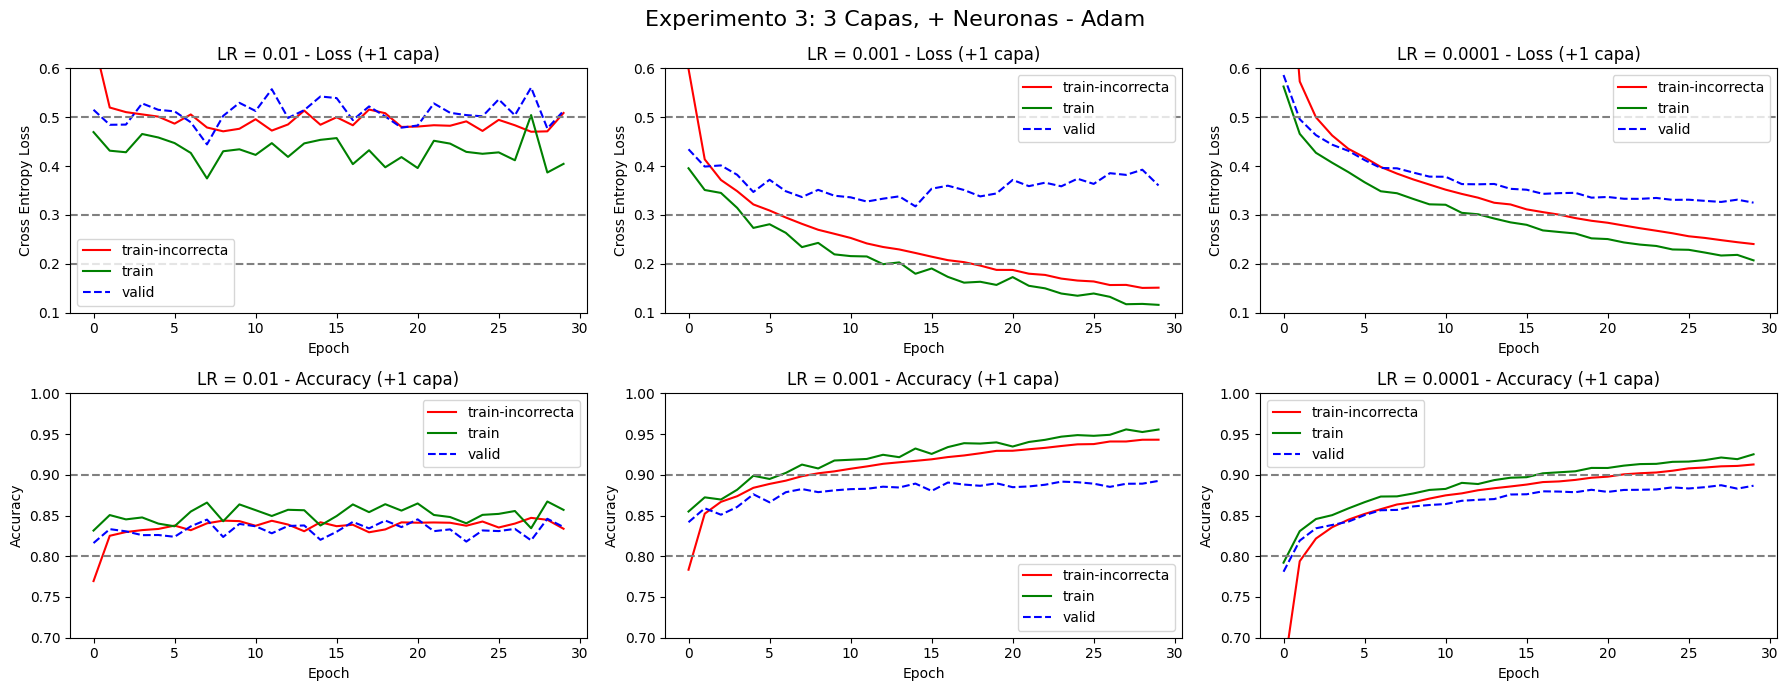

In [ ]:
### GRILLA (Loss / Accuracy) - Comparación de LR
fig, axes = plt.subplots(2, 3, figsize=(18, 7))
fig.suptitle("Experimento 3: 3 Capas, + Neuronas - Adam", fontsize=16)

for idx, lr in enumerate(learning_rates_biglayer):

    train_loss, valid_loss = results_biglayer_loss[lr]
    train_acc, valid_acc   = results_biglayer_acc[lr]

    train_loss_inc = results_biglayer_loss_inc[lr]
    train_acc_inc  = results_biglayer_acc_inc[lr]

    # ---- LOSS ----
    axes[0][idx].plot(train_loss_inc, label="train-incorrecta", color="red")
    axes[0][idx].plot(train_loss,     label="train", color="green")
    axes[0][idx].plot(valid_loss,     linestyle="--", label="valid", color="blue")
    axes[0][idx].set_title(f"LR = {lr} - Loss (+1 capa)")
    axes[0][idx].set_xlabel("Epoch")
    axes[0][idx].set_ylabel("Cross Entropy Loss")
    axes[0][idx].set_ylim(0.10, 0.60)
    axes[0][idx].axhline(y=0.50, linestyle="--", color='grey')
    axes[0][idx].axhline(y=0.30, linestyle="--", color="gray")
    axes[0][idx].axhline(y=0.20, linestyle="--", color="gray")
    axes[0][idx].legend()

    # ---- ACCURACY ----
    axes[1][idx].plot(train_acc_inc, label="train-incorrecta", color="red")
    axes[1][idx].plot(train_acc,     label="train", color="green")
    axes[1][idx].plot(valid_acc,     linestyle="--", label="valid", color="blue")
    axes[1][idx].set_title(f"LR = {lr} - Accuracy (+1 capa)")
    axes[1][idx].set_xlabel("Epoch")
    axes[1][idx].set_ylabel("Accuracy")
    axes[1][idx].set_ylim(0.70, 1.00)
    axes[1][idx].axhline(y=0.80, linestyle="--", color="gray")
    axes[1][idx].axhline(y=0.90, linestyle="--", color="gray")
    axes[1][idx].legend()

plt.tight_layout()
plt.show()


Modelo Baseline:
El modelo Baseline muestra un desempeño inicial moderado, con una pérdida (loss) aproximada del 50% y una exactitud (accuracy) que supera levemente el 80% para el conjunto de validación después de la epoch 30. Esto indica que, sin optimizaciones adicionales, el modelo ya captura cierta señal de los datos, aunque aún existe espacio para mejoras significativas en la reducción de la pérdida y aumento de la exactitud.

Modelo con optimizador Adam:
El uso del optimizador Adam generó una mejora notable. A partir de la epoch 15-20, la pérdida de validación se estabiliza alrededor del 30%, mientras que la exactitud casi alcanza el 90%. Esto evidencia que Adam permite un aprendizaje más rápido y estable, logrando una convergencia más eficiente que el modelo Baseline y un desempeño superior en términos de predicción.

Impacto de diferentes tasas de aprendizaje (LR):
Incluso con Adam, para este dataset y modelo, la elección de la tasa de aprendizaje es crucial. Para LR = 0.01 se observa una alta volatilidad e inestabilidad en las métricas de validación. En cambio, para LR = 0.001 y 0.0001, tanto la pérdida como la exactitud presentan un comportamiento similar, aunque con LR = 0.001 la convergencia es más rápida, alcanzando casi una pérdida de 0.3 y una exactitud cercana a 0.9 en un Epoch 10/15 vs un Epoch 20/25 del modelo con LR menor. Esto muestra que un LR demasiado alto puede dificultar la estabilidad, mientras que un LR moderado equilibra velocidad y consistencia.

Modelo con más neuronas:
El modelo con mayor cantidad de neuronas no siempre resulta en un mejor desempeño. El modelo con 4 capas lineales (256 → 128 → 64 → 10 neuronas) en las capas ocultas, con el optimizador SGD, alcanzó un loss cercano al 50% y una accuracy de aproximadamente 80%, similar al modelo Baseline. Esto muestra que aumentar la capacidad de la red no garantiza mejoras automáticas y que la arquitectura debe ajustarse según la complejidad y cantidad de datos disponibles. Por no ser interesante, el modelo fue instanciado pero ya no se presenta en el código.

En el caso de optimziador Adam, con 4 capas lineales (256 → 128 → 64 → 10 neuronas) en las capas ocultas, ...
, alcanzó un loss cercano al ...% y una accuracy aproximada del ...%,


#### CNN

La arquitectura MLP no explota la información espacial de las imágenes, por lo que su performance se estanca antes del 90% de accuracy en Fashion-MNIST. El uso de redes convolucionales (CNN), incluso simples como LeNet-5, mejora significativamente la convergencia, reduce el loss y supera el 90% de accuracy en el conjunto de validación.

In [ ]:
### 5.11.4) Experimento: CNN Simple (LeNet-5)
### Experimento 4: Optimizador Adam - Red Neuronal Convolucional

class CNN_LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)     # 28→24
        self.pool  = nn.MaxPool2d(2, 2)                # 24→12
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)    # 12→8

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)


learning_rates_lenet = [1e-2, 1e-3, 1e-4]
num_epochs_lenet = 30

# Diccionarios NUEVOS (sin pisar otros experimentos)
results_lenet_loss = {}
results_lenet_acc = {}
results_lenet_loss_inc = {}
results_lenet_acc_inc = {}

for lr in learning_rates_lenet:
    print(f"\n===== [CNN LeNet-5] Adam LR={lr} =====")

    model_lenet = CNN_LeNet().to(device)
    optimizer_lenet = torch.optim.Adam(model_lenet.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    # Métricas CORRECTAS (evaluadas)
    list_train_loss_lenet = []
    list_valid_loss_lenet = []
    list_train_acc_lenet = []
    list_valid_acc_lenet = []

    # Métricas INCORRECTAS (línea roja)
    list_train_loss_lenet_inc = []
    list_train_acc_lenet_inc = []

    for epoch in range(num_epochs_lenet):
        print(f"\n--------------------------------------------------")
        print(f"Epoch {epoch+1}\n----------")

        # ENTRENAMIENTO (incorrecto)
        train_loss_inc, train_acc_inc = train_loop(train_loader, model_lenet, loss_fn, optimizer_lenet)

        list_train_loss_lenet_inc.append(train_loss_inc)
        list_train_acc_lenet_inc.append(train_acc_inc)

        # EVALUACIÓN (correcto)
        train_loss, train_acc = eval_loop(train_loader, model_lenet, loss_fn, ds_train_valid="train")
        valid_loss, valid_acc = eval_loop(valid_loader, model_lenet, loss_fn, ds_train_valid="valid")

        list_train_loss_lenet.append(train_loss)
        list_valid_loss_lenet.append(valid_loss)
        list_train_acc_lenet.append(train_acc)
        list_valid_acc_lenet.append(valid_acc)

    # Guardamos en diccionarios
    results_lenet_loss[lr] = (list_train_loss_lenet, list_valid_loss_lenet)
    results_lenet_acc[lr]  = (list_train_acc_lenet, list_valid_acc_lenet)
    results_lenet_loss_inc[lr] = list_train_loss_lenet_inc
    results_lenet_acc_inc[lr]  = list_train_acc_lenet_inc

print("\nDone!")



===== [CNN LeNet-5] Adam LR=0.01 =====

--------------------------------------------------
Epoch 1
----------
@train_loop batch=     0 avrg_loss =2.310003 sample procesados= 0.166667%
@train_loop batch=    60 avrg_loss =0.979484 sample procesados= 10.166667%
@train_loop batch=   120 avrg_loss =0.807210 sample procesados= 20.166667%
@train_loop batch=   180 avrg_loss =0.725273 sample procesados= 30.166667%
@train_loop batch=   240 avrg_loss =0.674261 sample procesados= 40.166667%
@train_loop batch=   300 avrg_loss =0.635367 sample procesados= 50.166667%
@train_loop batch=   360 avrg_loss =0.604485 sample procesados= 60.166667%
@train_loop batch=   420 avrg_loss =0.582167 sample procesados= 70.166667%
@train_loop batch=   480 avrg_loss =0.562534 sample procesados= 80.166667%
@train_loop batch=   540 avrg_loss =0.547150 sample procesados= 90.166667%
@eval_loop [train] avg_loss = 0.364467 precision = 86.7%
@eval_loop [valid] avg_loss = 0.398815 precision = 85.7%

-------------------------

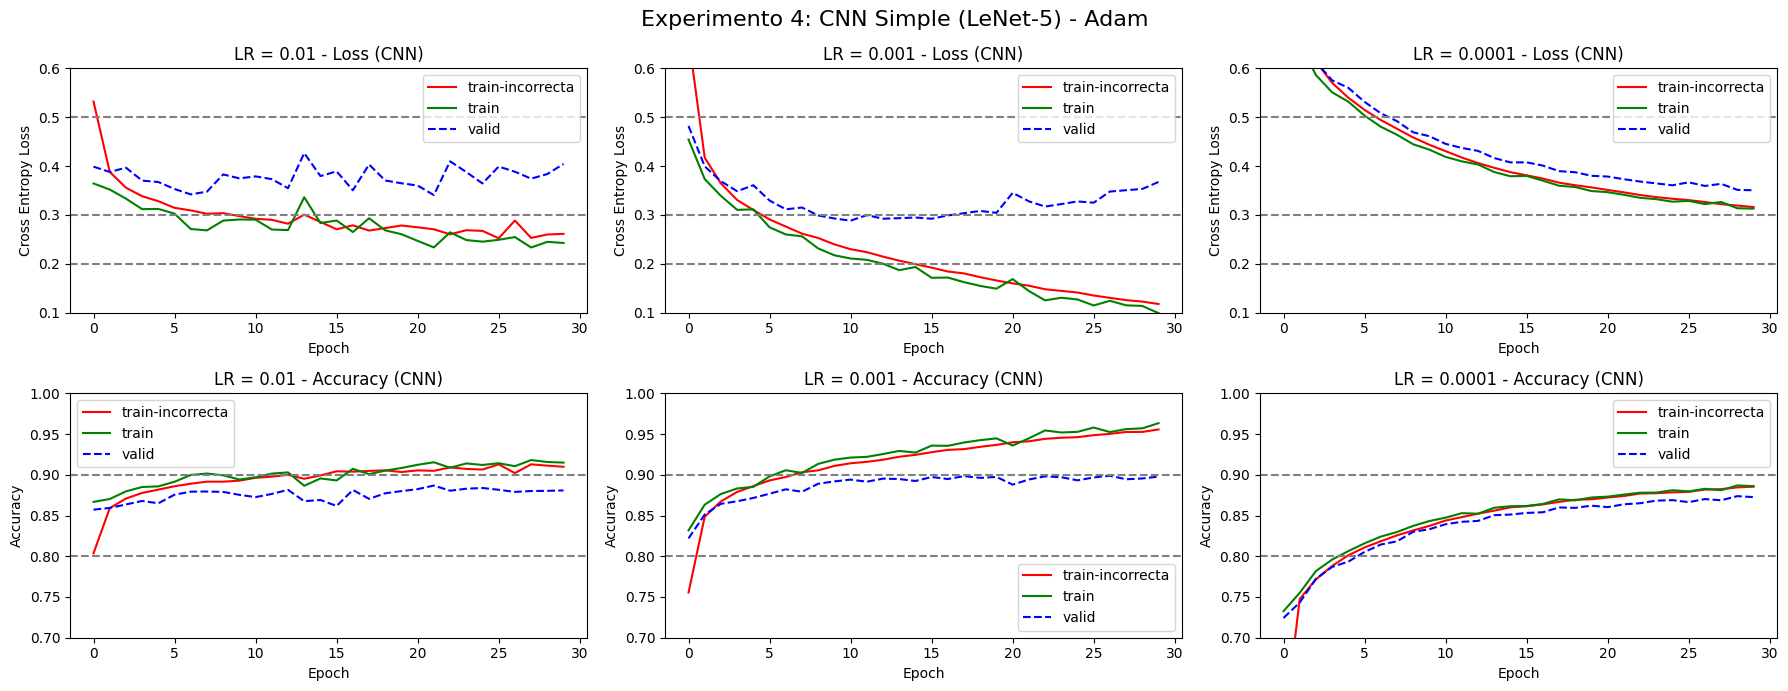

In [ ]:
### GRILLA (LOSS / ACCURACY) - Comparación de LR para CNN LeNet-5

fig, axes = plt.subplots(2, 3, figsize=(18, 7))
fig.suptitle("Experimento 4: CNN Simple (LeNet-5) - Adam", fontsize=16)

for idx, lr in enumerate(learning_rates_lenet):

    train_loss, valid_loss = results_lenet_loss[lr]
    train_acc, valid_acc   = results_lenet_acc[lr]

    train_loss_inc = results_lenet_loss_inc[lr]
    train_acc_inc  = results_lenet_acc_inc[lr]

    # ---- LOSS ----
    axes[0][idx].plot(train_loss_inc, label="train-incorrecta", color="red")
    axes[0][idx].plot(train_loss,     label="train", color="green")
    axes[0][idx].plot(valid_loss,     linestyle="--", label="valid", color="blue")
    axes[0][idx].set_title(f"LR = {lr} - Loss (CNN)")
    axes[0][idx].set_xlabel("Epoch")
    axes[0][idx].set_ylabel("Cross Entropy Loss")
    axes[0][idx].set_ylim(0.10, 0.60)
    axes[0][idx].axhline(y=0.50, linestyle="--", color='grey')
    axes[0][idx].axhline(y=0.30, linestyle="--", color="gray")
    axes[0][idx].axhline(y=0.20, linestyle="--", color="gray")
    axes[0][idx].legend()

    # ---- ACCURACY ----
    axes[1][idx].plot(train_acc_inc, label="train-incorrecta", color="red")
    axes[1][idx].plot(train_acc,     label="train", color="green")
    axes[1][idx].plot(valid_acc,     linestyle="--", label="valid", color="blue")
    axes[1][idx].set_title(f"LR = {lr} - Accuracy (CNN)")
    axes[1][idx].set_xlabel("Epoch")
    axes[1][idx].set_ylabel("Accuracy")
    axes[1][idx].set_ylim(0.70, 1.00)
    axes[1][idx].axhline(y=0.80, linestyle="--", color="gray")
    axes[1][idx].axhline(y=0.90, linestyle="--", color="gray")
    axes[1][idx].legend()

plt.tight_layout()
plt.show()
